# Tutorial 2

In [1]:
import numpy as np
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

## Exercice 1 : A consine wave

### a) Let's consider the signal $x(t) = 5 cos(628 * t)$

Calculate the period in second [s]

In [2]:
period = (2 * np.pi) / np.abs(628)
print(f"period = {period} second")

period = 0.010005072145190424 second


Calculate the frequency in Hertz [Hz]

In [3]:
frequency = 1 / period
print(f"frequency = {frequency} Hertz")

frequency = 99.94930426171027 Hertz


Calculate the angular frequency in radian-per-second [rad/s]

In [4]:
angular_frequency = 2 * np.pi * frequency
print(f"angular frequency = {angular_frequency} rad/s")

angular frequency = 628.0 rad/s


What is the magnitude of this cosine?

In [5]:
x = np.linspace(0, 10, 10)
y = 5 * np.cos(628 * x)
magnitude = max(y)
print(f"magnitude = {magnitude}")

magnitude = 5.0


What is the phase of this cosine?

For this signal, we don't have phase.

Then $\phi = 0$

### b) Let's consider the above signal sampled with the sampling frequency $\mathit{F}_{s} = 1kHz$ over 10 seconds

What is the resulting length 𝑁 of this signal? (i.e. how many samples?)

In [6]:
samples = 1000 * 10
print(f"samples = {samples}")

samples = 10000


Construct the time axis t (from 0 to 10s)

In [7]:
x = np.linspace(0, 10, samples)

plot the signal in the time domain (i.e. x versus t)

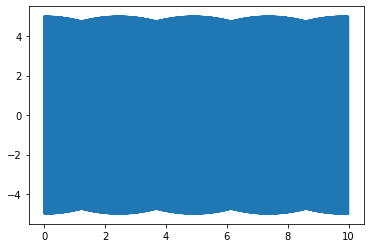

In [8]:
y = 5 * np.cos(628 * x)
plt.plot(x, y)
plt.show()

Inspect the time domain signal to measure the period of the signal (use close-ups to investigate closely the signal). Is it the same as the once calculated in a)?

![title]("TP2/img/plot_zoomed.png")

After graphic reading, we can get a period of 0.01 s

### c) Frequency domain analysis

What is the frequency resolution Δ𝑓 of the signal?

In [9]:
frequency_resolution = 1000 / samples
print(f"frequency resolution = {frequency_resolution} Hz")

frequency resolution = 0.1 Hz


Define a function “discrete_Fourrier_Transform()”, that takes as an input a signal and the sampling frequency, and returns as output its discrete Fourier transform 𝑋𝑘 and the frequency axis 𝑓.

In [10]:
def discrete_fourrier_transform(signal, fs):
    x = []
    for k in range(samples):
        xk = 0
        for i in range(samples):
            xk += signal[i]*np.exp(-2*np.pi*1j*i*k/samples)
        x.append(xk)
    return x



In [11]:
res = discrete_fourrier_transform(y, 1000)
print(len(res))
print(res)

10000
[(0.3387762418000593+0j), (0.3387718492386016+0.015096761249497704j), (0.3387586722021547+0.030193610230370507j), (0.33873670988647486+0.045290634598566935j), (0.3387059626930373+0.06038792215052099j), (0.33866642978466377+0.07548556071126385j), (0.3386181108440356+0.09058363797746055j), (0.3385610053672705+0.10568224171067211j), (0.33849511241025887+0.12078145976264706j), (0.3384204314074539+0.13588137973521675j), (0.3383369614183591+0.15098208952485015j), (0.3382447013789154+0.16608367703652874j), (0.3381436502598856+0.18118622989630417j), (0.3380338067915716+0.19628983620109114j), (0.33791516961695667+0.21139458363228247j), (0.33778773738978884+0.22650056005497202j), (0.3376515086366103+0.241607853605799j), (0.3375064815437403+0.2567165521005935j), (0.3373526543793055+0.27182674352658764j), (0.33719002543968735+0.2869385157556593j), (0.3370185926877909+0.3020519570001131j), (0.336838354079255+0.31716715529254697j), (0.33664930745104815+0.3322841986534193j), (0.3364514504756739

In [12]:
res_real = []
res_imagi = []
for i in range(len(res)):
    res_real.append(abs(res[i].real))
    res_imagi.append(abs(res[i].imag))

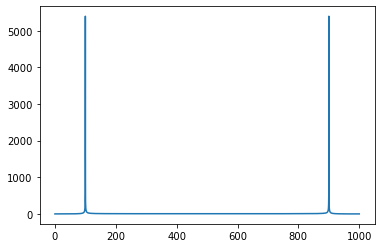

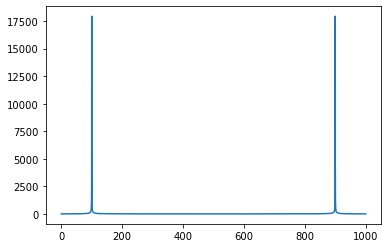

In [13]:
x_res = np.linspace(0, 1000, samples)
plt.plot(x_res, res_real)
plt.show()
plt.plot(x_res, res_imagi)
plt.show()

On peut observer deux piques, les harmoniques sont aux mêmes fréquences pour la partie imaginaire et réelle.
Cependant, on remarque que la partie imaginaire possède une plus grande amplitude.

In [22]:
res_real_normalized = []
res_imagi_normalized = []
for i in range(len(res)):
    res_real_normalized.append(abs(res[i].real)/samples)
    res_imagi_normalized.append(abs(res[i].imag)/samples)

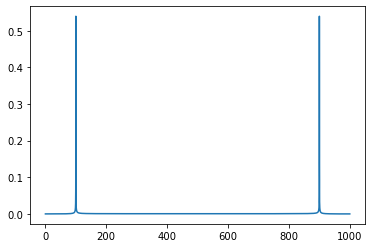

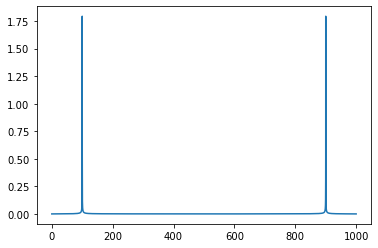

In [23]:
x_res_normalized = np.linspace(0, 1000, samples)
plt.plot(x_res_normalized, res_real_normalized)
plt.show()
plt.plot(x_res_normalized, res_imagi_normalized)
plt.show()

Les amplitudes gardent le même ordre de grandeur et cela vaut même si la longueur du signal change.

### d) Fast Fourrier Tansform using python

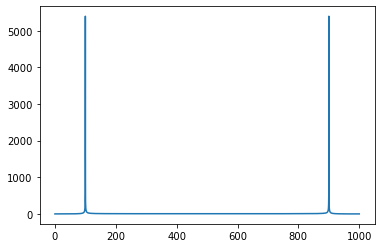

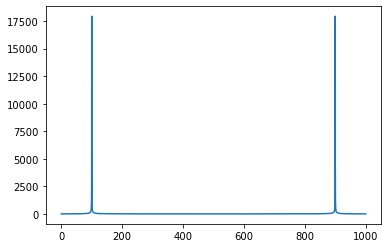

In [14]:
sp = np.fft.fft(y)
plt.plot(x_res, abs(sp.real))
plt.show()
plt.plot(x_res, abs(sp.imag))
plt.show()

Notre transformé de Fourrier (question c)) semble cohérente avec celle proposée par le module numpy, on observe les mêmes amplitudes et mêmes harmoniques.

In [18]:
sp_real_normalized = []
sp_imagi_normalized = []
for i in range(len(sp)):
    sp_real_normalized.append(abs(sp[i].real)/samples)
    sp_imagi_normalized.append(abs(sp[i].imag)/samples)

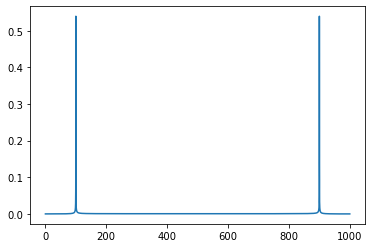

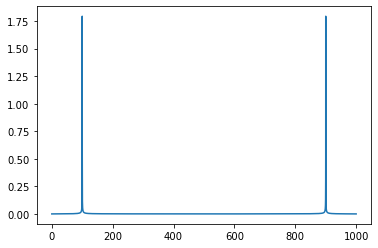

In [19]:
x_sp_normalized = np.linspace(0, 1000, samples)
plt.plot(x_sp_normalized, sp_real_normalized)
plt.show()
plt.plot(x_sp_normalized, sp_imagi_normalized)
plt.show()

The amplitude of peaks is still the same as the one we obtained (question c)).

### e) A noisy signal: Now add a white Gaussian noise 𝑛(𝑡) to the signal: 𝑥(𝑡)=5𝑐𝑜𝑠(628∗𝑡)+𝑛(𝑡). The standard deviation of the noise is 𝜎𝑛=6

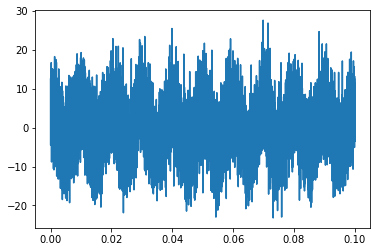

In [38]:
x = np.linspace(0, 0.10, samples)
noise = np.random.normal(0, 6, samples)
y_noise = 5 * np.cos(628 * x) + noise
plt.plot(x, y_noise)
plt.show()

In [47]:
sp_noise = np.fft.fft(y_noise)
#plt.plot(x_res, abs(sp_noise.real))
#plt.show()
#plt.plot(x_res, abs(sp_noise.imag))
#plt.show()

In [42]:
sp_noise_real_normalized = []
sp_noise_imagi_normalized = []
for i in range(len(sp)):
    sp_noise_real_normalized.append(abs(sp_noise[i].real)/samples)
    sp_noise_imagi_normalized.append(abs(sp_noise[i].imag)/samples)

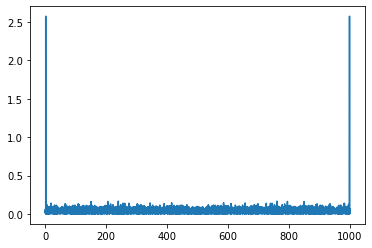

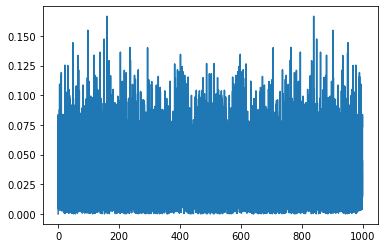

In [46]:
x_sp_normalized = np.linspace(0, 1000, samples)
plt.plot(x_sp_normalized, sp_noise_real_normalized)
plt.show()
plt.plot(x_sp_normalized, sp_noise_imagi_normalized)
plt.show()

On remarque que les deux parties sont affectées par le bruit que nous avons rajouté, en particulier la partie imaginaire qui l'est  beaucoup plus que la partie réelle.

On peut seulement afficher la moitié du spectre car il y a une symétrie.